In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from xgboost import XGBClassifier
import statistics

# EDA

In [2]:
df = pd.read_csv('telco_churn_dataset - telco_churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,204.8,106,15.5,4,0,354,705,119,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,169.5,106,10.3,9,5,326,292,75,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,...,126.8,82,8.0,4,2,324,1840,257,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,130.0,92,8.8,4,0,228,1389,180,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,...,236.5,137,12.0,2,1,294,170,1,340.4,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 35 columns):
customerID                   3333 non-null object
gender                       3333 non-null object
SeniorCitizen                3333 non-null int64
MaritalStatus                3333 non-null object
Dependents                   3333 non-null object
tenure                       3333 non-null int64
PhoneService                 3333 non-null object
MultipleLines                3333 non-null object
InternetService              3333 non-null object
OnlineSecurity               3333 non-null object
OnlineBackup                 3333 non-null object
DeviceProtection             3333 non-null object
TechSupport                  3333 non-null object
StreamingTV                  3333 non-null object
StreamingMovies              3333 non-null object
Contract                     3333 non-null object
PaperlessBilling             3333 non-null object
PaymentMethod                3333 non-null ob

In [4]:
df.isna().sum()

customerID                   0
gender                       0
SeniorCitizen                0
MaritalStatus                0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
PaymentMethod                0
InternationalPlan            0
VoiceMailPlan                0
NumbervMailMessages          0
TotalDayMinutes              0
TotalDayCalls                0
TotalEveMinutes              0
TotalEveCalls                0
TotalNightMinutes            0
TotalNightCalls              0
TotalIntlMinutes             0
TotalIntlCalls               0
CustomerServiceCalls         0
TotalCall                    0
TotalHighBandwidthMinutes    0
TotalHig

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(3328, 35)

In [7]:
df.Churn.value_counts()

No     2675
Yes     653
Name: Churn, dtype: int64

In [8]:
continuous = df.describe().columns
continuous

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue'],
      dtype='object')

## Is there a higher average tenure with people who stay or leave?

In [9]:
tenure_churn = df.drop(df.columns.difference(['tenure','Churn']), 1)

In [10]:
no_churn = tenure_churn.loc[tenure_churn['Churn'] == 'No']
no_churn.tenure.mean()

31.377570093457944

In [11]:
yes_churn = tenure_churn.loc[tenure_churn['Churn'] == 'Yes']
yes_churn.tenure.mean()

14.385911179173048

In [12]:
# There is a higher average tenure amongst no churn group, meaning people leave quicker

## Are more people leaving with a higher average or median bill?

### Average

In [13]:
revenue_churn = df.drop(df.columns.difference(['Churn', 'TotalRevenue']), 1)
revenue_churn.head()

,TotalRevenue,Churn
0,593.3,No
1,280.9,Yes
2,571.5,No
3,7904.3,No
4,340.4,No


In [14]:
no_churn = revenue_churn.loc[revenue_churn['Churn'] == 'No']
no_churn.TotalRevenue.mean()

1797.4495700934567

In [15]:
yes_churn = revenue_churn.loc[tenure_churn['Churn'] == 'Yes']
yes_churn.TotalRevenue.mean()

1164.7442572741188

In [16]:
# A higher average total_revenue amongst customers who do not leave

### Median

In [17]:
print(statistics.median(no_churn.TotalRevenue))
print(statistics.median(yes_churn.TotalRevenue))

978.0
487.1


In [18]:
# The people who leave have a lower median total_revenue then people who stay

## Make ints astype floats

In [19]:
def float_columns(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df[col] = df[col].astype(float)

In [20]:
float_columns(df)

In [21]:
# check results to verify function worked correctly

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3332
Data columns (total 35 columns):
customerID                   3328 non-null object
gender                       3328 non-null object
SeniorCitizen                3328 non-null float64
MaritalStatus                3328 non-null object
Dependents                   3328 non-null object
tenure                       3328 non-null float64
PhoneService                 3328 non-null object
MultipleLines                3328 non-null object
InternetService              3328 non-null object
OnlineSecurity               3328 non-null object
OnlineBackup                 3328 non-null object
DeviceProtection             3328 non-null object
TechSupport                  3328 non-null object
StreamingTV                  3328 non-null object
StreamingMovies              3328 non-null object
Contract                     3328 non-null object
PaperlessBilling             3328 non-null object
PaymentMethod                3328 non-nul

In [22]:
# look at all columns and drop unncessary ones
pd.set_option('display.max_columns', None)
df.drop(columns = ['gender', 'customerID'], inplace = True)

## Split data and run a logistic regression model

In [34]:
df.head()

,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0.0,168.8,137.0,241.4,107.0,204.8,106.0,15.5,4.0,0.0,354.0,705.0,119.0,593.3,No
1,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0.0,122.2,112.0,131.7,94.0,169.5,106.0,10.3,9.0,5.0,326.0,292.0,75.0,280.9,Yes
2,0.0,No,Yes,9.0,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36.0,178.7,134.0,178.6,102.0,126.8,82.0,8.0,4.0,2.0,324.0,1840.0,257.0,571.5,No
3,1.0,Yes,No,71.0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0.0,190.2,68.0,262.2,64.0,130.0,92.0,8.8,4.0,0.0,228.0,1389.0,180.0,7904.3,No
4,1.0,No,No,7.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0.0,67.7,68.0,195.7,86.0,236.5,137.0,12.0,2.0,1.0,294.0,170.0,1.0,340.4,No


In [23]:
y = df['Churn']
X = df.drop(columns = ['Churn'], axis = 1)

In [318]:
lr = LogisticRegression()

## Make categorical variable ordinal with LabelEncoder then OneHotEncoder

In [24]:
enc = OneHotEncoder(categories='auto')
X = enc.fit_transform(X).toarray()

In [25]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_hat = lr.predict(X_train)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

<BarContainer object of 10419 artists>

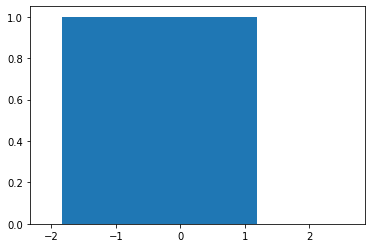

In [44]:
coef = lr.coef_
plt.bar(coef[0], X_train[0])

In [356]:
q_train= X_train.select_dtypes(exclude = 'object')
w_train= X_train.select_dtypes(exclude = 'float64')
t_test= X_test.select_dtypes(exclude = 'object')
k_test= X_test.select_dtypes(exclude = 'float64')


In [364]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
array_to_df = ohc.fit_transform(w_train).toarray()
categorical = pd.DataFrame(array_to_df, columns=ohc.get_feature_names())
categorical.reset_index()
X_train.reset_index()
categorical.join(X_train)

# array_to_df = ohc.fit_transform(q_train).toarray()
# categorical = pd.DataFrame(array_to_df, columns=ohc.get_feature_names())
# categorical.reset_index()
# X_train.reset_index()
# categorical.join(X_train)

,x0_0,x0_1,x1_No,x1_Yes,x2_Yes,x3_No,x3_Yes,x4_DSL,x4_Fiber optic,x4_No,x5_No,x5_No internet service,x5_Yes,x6_No,x6_No internet service,x6_Yes,x7_No,x7_No internet service,x7_Yes,x8_No,x8_No internet service,x8_Yes,x9_No,x9_No internet service,x9_Yes,x10_No,x10_No internet service,x10_Yes,x11_Month-to-month,x11_One year,x11_Two year,x12_No,x12_Yes,x13_Bank transfer (automatic),x13_Credit card (automatic),x13_Electronic check,x13_Mailed check,x14_No,x14_Yes,x15_No,x15_Yes,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0.0,168.8,137.0,241.4,107.0,204.8,106.0,15.5,4.0,0.0,354.0,705.0,119.0,593.3
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0.0,122.2,112.0,131.7,94.0,169.5,106.0,10.3,9.0,5.0,326.0,292.0,75.0,280.9
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Yes,9.0,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36.0,178.7,134.0,178.6,102.0,126.8,82.0,8.0,4.0,2.0,324.0,1840.0,257.0,571.5
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,No,71.0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0.0,190.2,68.0,262.2,64.0,130.0,92.0,8.8,4.0,0.0,228.0,1389.0,180.0,7904.3
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No,7.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0.0,67.7,68.0,195.7,86.0,236.5,137.0,12.0,2.0,1.0,294.0,170.0,1.0,340.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,No,55.0,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,No,Yes,37.0,219.9,102.0,222.1,77.0,118.5,111.0,10.0,4.0,1.0,295.0,633.0,37.0,5552.1
2658,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,19.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,No,No,0.0,189.0,100.0,118.5,99.0,248.1,87.0,17.1,6.0,0.0,292.0,150.0,33.0,839.7
2659,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,No,Yes,31.0,82.3,105.0,256.1,91.0,229.6,98.0,11.8,2.0,6.0,30